### Edgar Moises Hernandez-Gonzalez
#### 13/05/20-19/05/20
#### Regresion con MLP para predecir la funcion seno
##### Salida: Vector
##### Division de datos con train_test_split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
#para predecir seno
datos = [-0.0000, -0.0634, -0.1266, -0.1893, -0.2511, -0.3120, -0.3717,
         -0.4298, -0.4862, -0.5406, -0.5929, -0.6428, -0.6901, -0.7346,
         -0.7761, -0.8146, -0.8497, -0.8815, -0.9096, -0.9341, -0.9549,
         -0.9718, -0.9848, -0.9938, -0.9989, -0.9999, -0.9969, -0.9898, 
         -0.9788, -0.9638, -0.9450, -0.9224, -0.8960, -0.8660, -0.8326, 
         -0.7958, -0.7557, -0.7127, -0.6668, -0.6182, -0.5671, -0.5137, 
         -0.4582, -0.4009, -0.3420, -0.2817, -0.2203, -0.1580, -0.0951,
         -0.0317, 0.0317, 0.0951, 0.1580, 0.2203, 0.2817, 0.3420, 0.4009,
         0.4582, 0.5137, 0.5671, 0.6182, 0.6668, 0.7127, 0.7557, 0.7958,
         0.8326, 0.8660, 0.8960, 0.9224, 0.9450, 0.9638, 0.9788, 0.9898,
         0.9969, 0.9999, 0.9989, 0.9938, 0.9848, 0.9718, 0.9549, 0.9341,
         0.9096, 0.8815, 0.8497, 0.8146, 0.7761, 0.7346, 0.6901, 0.6428,
         0.5929, 0.5406, 0.4862, 0.4298, 0.3717, 0.3120, 0.2511, 0.1893,
         0.1266, 0.0634, 0.0000]

In [4]:
len(datos)

100

In [0]:
len_samples = 7
len_vector = 3
x, y = split_sequence(datos, len_samples, len_vector)

In [6]:
print(x.shape)
print(y.shape)

(91, 7)
(91, 3)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(68, 7)
(23, 7)
(68, 3)
(23, 3)


In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=x.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(len_vector))

model.compile(optimizer = 'adam', loss = 'mse')

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test, y_test), verbose=2)

Train on 68 samples, validate on 23 samples
Epoch 1/20
 - 0s - loss: 0.3727 - val_loss: 0.3870
Epoch 2/20
 - 0s - loss: 0.2666 - val_loss: 0.2691
Epoch 3/20
 - 0s - loss: 0.1902 - val_loss: 0.1872
Epoch 4/20
 - 0s - loss: 0.1344 - val_loss: 0.1245
Epoch 5/20
 - 0s - loss: 0.0916 - val_loss: 0.0775
Epoch 6/20
 - 0s - loss: 0.0619 - val_loss: 0.0451
Epoch 7/20
 - 0s - loss: 0.0443 - val_loss: 0.0264
Epoch 8/20
 - 0s - loss: 0.0359 - val_loss: 0.0204
Epoch 9/20
 - 0s - loss: 0.0333 - val_loss: 0.0192
Epoch 10/20
 - 0s - loss: 0.0328 - val_loss: 0.0182
Epoch 11/20
 - 0s - loss: 0.0298 - val_loss: 0.0164
Epoch 12/20
 - 0s - loss: 0.0257 - val_loss: 0.0161
Epoch 13/20
 - 0s - loss: 0.0227 - val_loss: 0.0172
Epoch 14/20
 - 0s - loss: 0.0209 - val_loss: 0.0170
Epoch 15/20
 - 0s - loss: 0.0195 - val_loss: 0.0162
Epoch 16/20
 - 0s - loss: 0.0177 - val_loss: 0.0132
Epoch 17/20
 - 0s - loss: 0.0147 - val_loss: 0.0088
Epoch 18/20
 - 0s - loss: 0.0120 - val_loss: 0.0064
Epoch 19/20
 - 0s - loss: 0.0

In [12]:
test_loss = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)

Test loss: 0.004488200414925814


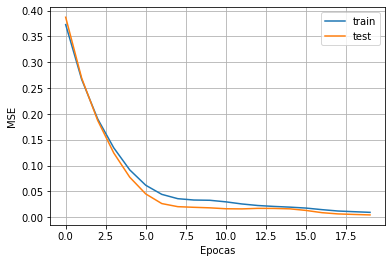

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [0]:
y_pred = model.predict(x_test)

In [15]:
df_y_test = pd.DataFrame(y)
df_y_pred = pd.DataFrame(y_pred)
comparar = pd.concat([df_y_test, df_y_pred], axis=1)
comparar

,0,1,2,0,1,2
0,-0.4298,-0.4862,-0.5406,-0.899591,-0.899289,-0.910553
1,-0.4862,-0.5406,-0.5929,0.959034,0.979399,0.940131
2,-0.5406,-0.5929,-0.6428,0.826272,0.899653,0.874976
3,-0.5929,-0.6428,-0.6901,-0.812478,-0.837592,-0.844969
4,-0.6428,-0.6901,-0.7346,0.382414,0.466638,0.502664
...,...,...,...,...,...,...
86,0.3717,0.3120,0.2511,NaN,NaN,NaN
87,0.3120,0.2511,0.1893,NaN,NaN,NaN
88,0.2511,0.1893,0.1266,NaN,NaN,NaN
89,0.1893,0.1266,0.0634,NaN,NaN,NaN


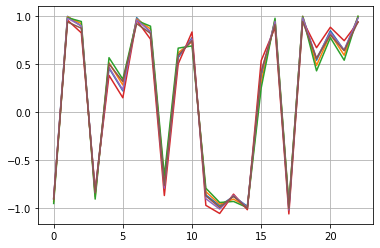

In [16]:
plt.plot(y_test)
plt.plot(y_pred)
plt.grid()
plt.show()

In [0]:
y_pred_todo = model.predict(x)

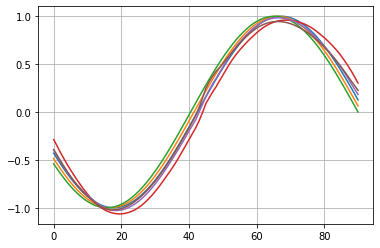

In [19]:
plt.plot(y)
plt.plot(y_pred_todo)
plt.grid()
plt.show()

In [20]:
num_test = 5
print("Etiqueta verdadera", y_test[num_test])
pred = model.predict(x_test[num_test].reshape(1,len_samples))
print("Etiqueta predicha", pred)

Etiqueta verdadera [0.2203 0.2817 0.342 ]
Etiqueta predicha [[0.14842807 0.23069713 0.31788164]]


In [0]:
x_verdad = np.zeros(len_samples)
for i in range(len_samples):
    x_verdad[i] = x_test[num_test, i]

In [0]:
futuro = np.zeros(len_vector)
for i in range(len_vector):
    futuro[i] = pred[0,i]

In [23]:
real = np.concatenate((x_verdad, y[num_test]))
real.shape

(10,)

In [24]:
predicho = np.concatenate((x_verdad, futuro))
predicho.shape

(10,)

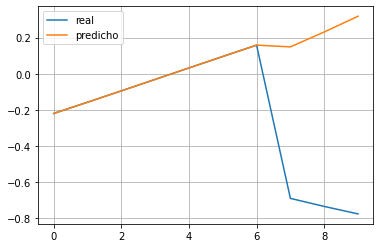

In [25]:
plt.plot(real)
plt.plot(predicho)
plt.grid()
plt.legend(['real', 'predicho'])
plt.show()